# Data
A dataset of mosquito images was downloaded from [Pise et al.(2022)](https://data.mendeley.com/datasets/88s6fvgg2p/4). The dataset contains images of 3 species:
* _Aedes aegypti_
* _Anopheles stephensi_
* _Culex quinquefasciatus_

This dataset uis licensed as CC BY 4.0

### References

 Pise, Reshma; PATIL, Kailas; Laad, Meena; Pise, Neeraj (2022), “Dataset of Vector Mosquito Images  ”, Mendeley Data, V4, doi: 10.17632/88s6fvgg2p.4


In [1]:
DATA_PATH = 'data' 

### Reformat the images

* Resize the images, to save memory and processing time.
* Transform the images into numpy arrays.
* Test the function by plotting the first image.

In [2]:
from os import listdir
from os.path import isfile, join
from PIL import Image, ImageDraw
import numpy as np
import json
from sklearn.model_selection import train_test_split

In [12]:
def format_image(path):
    """Takes a path to an image as input. Loads and rescales the image.
    Returns a numpy array representing the the image."""
    size = (300, 300)
    # Load the image using PIL
    pillow_img = Image.open(path)
    # get image crop
    pillow_img = pillow_img.resize(size)
    img = np.array(pillow_img)
#    return(img[:,:,0] ) # 0: red, 1: green, 2: blue channel
    return(img)

Try out the function on a test image

shape: (300, 300, 3)
min: 0 max: 224
dtype: uint8


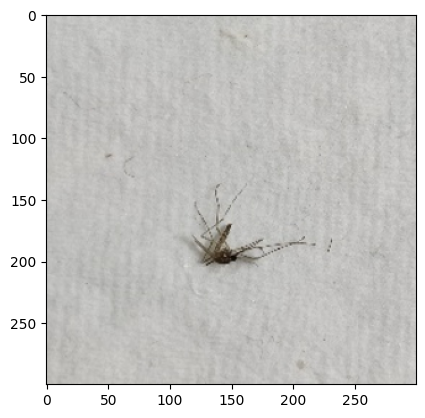

In [13]:
image_path = join(DATA_PATH, 'Aedes Aegypti', 'Aedes_aegypti_1.jpg')

img = format_image(image_path)
print('shape:', img.shape)
print('min:', img.min(), 'max:', img.max()) # min: 0 max: 255
print('dtype:', img.dtype) # uint8

%matplotlib inline
import matplotlib.pyplot as plt

# Plot the image
plt.imshow(img, cmap='gray') 
plt.show()

### Create feature matrix
* Create a matrix of features (image pixels) vs. labels (taxa)
* Split the data into train, validation and test datasets

In [14]:
def make_matrix_from_dir(path):
    """
    Takes a dir as argument and returns two numpy arrays: features and labels
    Returns:
    X: numpy array (img_width, img_height, 3), images
    y: numpy array str, labels ('Coleoptera', etc.)
    """
    # the feature matrix and labels list
    features = []  # the pixel data
    labels = []  # the image labels (species)

    # get a list of all images in the dataset
    taxa_in_dataset = [taxon for taxon in listdir(path) if not isfile(join(path, taxon))]
    for taxon in taxa_in_dataset:
        print(f"Processing taxon {taxon}")
        taxon_path = join(path, taxon)
        # list all image files
        img_file_paths = [join(taxon_path, f) for f in listdir(taxon_path) if isfile(join(taxon_path, f))]
        # load the image files
        for image_path in img_file_paths:
            # load image, convert to numpy array with 3 channels: RGB
            # resize and flatten the image to a 1-dimensional array,
            flat_img = format_image(image_path)
            features.append(flat_img)
            labels.append(taxon)
    # format the features array to a vector of dimensions (num_images, num_pixels_in_each_image)
    X = np.array(features)
    # pack labels in numpy array
    y = np.array(labels)
    return X, y

In [15]:
%%time
# Create a matrix of features (image pixels) vs. labels (taxa)
X, y = make_matrix_from_dir(DATA_PATH)

Processing taxon Anopheles Stephensi
Processing taxon Culex Quinquefasciatus
Processing taxon Aedes Aegypti
CPU times: user 2.8 s, sys: 236 ms, total: 3.03 s
Wall time: 3.03 s


In [16]:
# Split the data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)
print('The training dataset has {} entries, the test dataset {}.'.format(
    len(X_train), len(X_test)))

The training dataset has 1980 entries, the test dataset 660.


In [17]:
np.savez_compressed(join(DATA_PATH, 'train_data.npz'), X=X_train, y=y_train)
np.savez_compressed(join(DATA_PATH, 'test_data.npz'), X=X_test, y=y_test)